In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# Carregando a base

In [2]:
df_consumo_cerveja = pd.read_csv('Consumo_cerveja.csv')
df_consumo_cerveja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [3]:
df_consumo_cerveja

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Entendimento e Pré-Processamento

In [4]:
df_consumo_cerveja_limpo = df_consumo_cerveja.copy()

## Campos Nulos

In [5]:
df_consumo_cerveja_limpo.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [6]:
df_consumo_cerveja_limpo.isnull()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
936,True,True,True,True,True,True,True
937,True,True,True,True,True,True,True
938,True,True,True,True,True,True,True
939,True,True,True,True,True,True,True


In [7]:
df_consumo_cerveja_limpo = df_consumo_cerveja_limpo.dropna(how='all').copy()
df_consumo_cerveja_limpo

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


## Renomeando colunas

In [8]:
df_consumo_cerveja_limpo.columns = ['data', 'temp_media_c', 'temp_min_c', 'temp_max_c', 'precipitacao_mm', 'fds', 'consumo_L']
df_consumo_cerveja_limpo

,data,temp_media_c,temp_min_c,temp_max_c,precipitacao_mm,fds,consumo_L
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


## Análise por Coluna

### data

In [9]:
df_consumo_cerveja_limpo[['data']]

,data
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05
...,...
360,2015-12-27
361,2015-12-28
362,2015-12-29
363,2015-12-30


In [10]:
df_consumo_cerveja_limpo[['data']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    365 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Este campo deverá ser do tipo date.

In [11]:
df_aux = df_consumo_cerveja_limpo[['data']].copy()
df_aux['data'] = pd.to_datetime(df_aux['data']).dt.date
df_aux

,data
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05
...,...
360,2015-12-27
361,2015-12-28
362,2015-12-29
363,2015-12-30


Para fins de análise, seria interessante a extração do dia da semana e do mês.

In [12]:
alias_dia_semana = {
    0 : 'segunda-feira',
    1 : 'terça-feira',
    2 : 'quarta-feira',
    3 : 'quinta-feira',
    4 : 'sexta-feira',
    5 : 'sabado',
    6 : 'domingo'
}

df_aux['dia_semana'] = [data.weekday() for data in df_aux['data']]
df_aux['dia_semana'].replace(alias_dia_semana, inplace=True)
df_aux['dia_semana'] = pd.Categorical(df_aux['dia_semana'])
df_aux['dia_semana'].unique()

['quinta-feira', 'sexta-feira', 'sabado', 'domingo', 'segunda-feira', 'terça-feira', 'quarta-feira']
Categories (7, object): ['quinta-feira', 'sexta-feira', 'sabado', 'domingo', 'segunda-feira', 'terça-feira', 'quarta-feira']

In [13]:
alias_mes = {
    1  : 'janeiro',
    2  : 'fevereiro',
    3  : 'março',
    4  : 'abril',
    5  : 'maio',
    6  : 'junho',
    7  : 'julho',
    8  : 'agosto',
    9  : 'setembro',
    10 : 'outubro',
    11 : 'novembro',
    12 : 'dezembro'
}

df_aux['mes'] = [data.month for data in df_aux['data']]
df_aux['mes'].replace(alias_mes, inplace=True)
df_aux['mes'] = pd.Categorical(df_aux['mes'])
df_aux['mes'].unique()

['janeiro', 'fevereiro', 'março', 'abril', 'maio', ..., 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']
Length: 12
Categories (12, object): ['janeiro', 'fevereiro', 'março', 'abril', ..., 'setembro', 'outubro', 'novembro', 'dezembro']

In [14]:
df_consumo_cerveja_limpo['data'] = df_aux['data']
df_consumo_cerveja_limpo['dia_semana'] = df_aux['dia_semana']
df_consumo_cerveja_limpo['mes'] = df_aux['mes']
df_consumo_cerveja_limpo = df_consumo_cerveja_limpo[['data', 'dia_semana', 'mes', 'fds','temp_media_c', 'temp_min_c', 'temp_max_c', 'precipitacao_mm','consumo_L']]
df_consumo_cerveja_limpo

,data,dia_semana,mes,fds,temp_media_c,temp_min_c,temp_max_c,precipitacao_mm,consumo_L
0,2015-01-01,quinta-feira,janeiro,0.0,"27,3","23,9","32,5",0,25.461
1,2015-01-02,sexta-feira,janeiro,0.0,"27,02","24,5","33,5",0,28.972
2,2015-01-03,sabado,janeiro,1.0,"24,82","22,4","29,9",0,30.814
3,2015-01-04,domingo,janeiro,1.0,"23,98","21,5","28,6","1,2",29.799
4,2015-01-05,segunda-feira,janeiro,0.0,"23,82",21,"28,3",0,28.900
...,...,...,...,...,...,...,...,...,...
360,2015-12-27,domingo,dezembro,1.0,24,"21,1","28,2","13,6",32.307
361,2015-12-28,segunda-feira,dezembro,0.0,"22,64","21,1","26,7",0,26.095
362,2015-12-29,terça-feira,dezembro,0.0,"21,68","20,3","24,1","10,3",22.309
363,2015-12-30,quarta-feira,dezembro,0.0,"21,38","19,3","22,4","6,3",20.467


In [15]:
df_consumo_cerveja_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   data             365 non-null    object  
 1   dia_semana       365 non-null    category
 2   mes              365 non-null    category
 3   fds              365 non-null    float64 
 4   temp_media_c     365 non-null    object  
 5   temp_min_c       365 non-null    object  
 6   temp_max_c       365 non-null    object  
 7   precipitacao_mm  365 non-null    object  
 8   consumo_L        365 non-null    float64 
dtypes: category(2), float64(2), object(5)
memory usage: 24.3+ KB


### fds

In [16]:
df_consumo_cerveja_limpo.fds.unique()

array([0., 1.])

In [17]:
df_consumo_cerveja_limpo.fds

0      0.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
360    1.0
361    0.0
362    0.0
363    0.0
364    0.0
Name: fds, Length: 365, dtype: float64

Por ser um campo flag, deverá ser um int categorico

In [18]:
df_aux = df_consumo_cerveja_limpo[['fds']].copy()
df_aux['fds'] = pd.Categorical(df_aux.fds.astype(int), ordered=False)
df_aux['fds']

0      0
1      0
2      1
3      1
4      0
      ..
360    1
361    0
362    0
363    0
364    0
Name: fds, Length: 365, dtype: category
Categories (2, int64): [0, 1]

In [19]:
df_consumo_cerveja_limpo['fds'] = df_aux['fds']
df_consumo_cerveja_limpo['fds']

0      0
1      0
2      1
3      1
4      0
      ..
360    1
361    0
362    0
363    0
364    0
Name: fds, Length: 365, dtype: category
Categories (2, int64): [0, 1]

### temp_media_c

In [20]:
df_consumo_cerveja_limpo['temp_media_c']

0       27,3
1      27,02
2      24,82
3      23,98
4      23,82
       ...  
360       24
361    22,64
362    21,68
363    21,38
364    24,76
Name: temp_media_c, Length: 365, dtype: object

Este campo deverá ser do tipo float

In [21]:
df_aux = df_consumo_cerveja_limpo[['temp_media_c']].copy()
df_aux['temp_media_c'].replace(to_replace=',', value='.', regex=True, inplace=True)
df_aux['temp_media_c'] = df_aux['temp_media_c'].astype(float)
df_aux['temp_media_c']

0      27.30
1      27.02
2      24.82
3      23.98
4      23.82
       ...  
360    24.00
361    22.64
362    21.68
363    21.38
364    24.76
Name: temp_media_c, Length: 365, dtype: float64

In [22]:
df_consumo_cerveja_limpo['temp_media_c'] = df_aux['temp_media_c']
df_consumo_cerveja_limpo['temp_media_c']

0      27.30
1      27.02
2      24.82
3      23.98
4      23.82
       ...  
360    24.00
361    22.64
362    21.68
363    21.38
364    24.76
Name: temp_media_c, Length: 365, dtype: float64


### temp_min_c

In [23]:
df_consumo_cerveja_limpo['temp_min_c']

0      23,9
1      24,5
2      22,4
3      21,5
4        21
       ... 
360    21,1
361    21,1
362    20,3
363    19,3
364    20,2
Name: temp_min_c, Length: 365, dtype: object

Este campo deverá ser do tipo float

In [24]:
df_aux = df_consumo_cerveja_limpo[['temp_min_c']].copy()
df_aux['temp_min_c'].replace(to_replace=',', value='.', regex=True, inplace=True)
df_consumo_cerveja_limpo['temp_min_c'] = df_aux['temp_min_c'].astype(float)
df_consumo_cerveja_limpo['temp_min_c']

0      23.9
1      24.5
2      22.4
3      21.5
4      21.0
       ... 
360    21.1
361    21.1
362    20.3
363    19.3
364    20.2
Name: temp_min_c, Length: 365, dtype: float64

### temp_max_c

In [25]:
df_consumo_cerveja_limpo['temp_max_c']

0      32,5
1      33,5
2      29,9
3      28,6
4      28,3
       ... 
360    28,2
361    26,7
362    24,1
363    22,4
364      29
Name: temp_max_c, Length: 365, dtype: object

Este campo deverá ser do tipo float.

In [26]:
df_aux = df_consumo_cerveja_limpo[['temp_max_c']].copy()
df_aux['temp_max_c'].replace(to_replace=',', value='.', regex=True, inplace=True)
df_consumo_cerveja_limpo['temp_max_c'] = df_aux['temp_max_c'].astype(float)
df_consumo_cerveja_limpo['temp_max_c']

0      32.5
1      33.5
2      29.9
3      28.6
4      28.3
       ... 
360    28.2
361    26.7
362    24.1
363    22.4
364    29.0
Name: temp_max_c, Length: 365, dtype: float64

### precipitacao_mm

In [27]:
df_consumo_cerveja_limpo['precipitacao_mm']

0         0
1         0
2         0
3       1,2
4         0
       ... 
360    13,6
361       0
362    10,3
363     6,3
364       0
Name: precipitacao_mm, Length: 365, dtype: object

Este campo deverá ser do tipo float

In [28]:
df_aux = df_consumo_cerveja_limpo[['precipitacao_mm']].copy()
df_aux['precipitacao_mm'].replace(to_replace=',', value='.', regex=True, inplace=True)
df_consumo_cerveja_limpo['precipitacao_mm'] = df_aux['precipitacao_mm'].astype(float)
df_consumo_cerveja_limpo['precipitacao_mm']

0       0.0
1       0.0
2       0.0
3       1.2
4       0.0
       ... 
360    13.6
361     0.0
362    10.3
363     6.3
364     0.0
Name: precipitacao_mm, Length: 365, dtype: float64

### consumo_L

In [29]:
df_consumo_cerveja_limpo['consumo_L']

0      25.461
1      28.972
2      30.814
3      29.799
4      28.900
        ...  
360    32.307
361    26.095
362    22.309
363    20.467
364    22.446
Name: consumo_L, Length: 365, dtype: float64

Este campo está formatado da forma errada. O ponto é para diferenciar a casa do milhar, porém é do tipo float, logo o que deveria ser 25461 litros se torna 25,4 litros.

In [30]:
df_aux = df_consumo_cerveja_limpo[['consumo_L']].copy()
df_aux['consumo_L'] = df_aux.consumo_L.astype(str)
df_aux.consumo_L.replace(to_replace='\.', value='', inplace=True, regex=True)
df_aux['consumo_L'] = df_aux.consumo_L.astype(int)
df_aux.consumo_L

0      25461
1      28972
2      30814
3      29799
4        289
       ...  
360    32307
361    26095
362    22309
363    20467
364    22446
Name: consumo_L, Length: 365, dtype: int64

In [31]:
df_consumo_cerveja_limpo['consumo_L'] = df_aux.consumo_L
df_consumo_cerveja_limpo['consumo_L']

0      25461
1      28972
2      30814
3      29799
4        289
       ...  
360    32307
361    26095
362    22309
363    20467
364    22446
Name: consumo_L, Length: 365, dtype: int64

## Validando limpeza

In [32]:
df_informativo = df_consumo_cerveja_limpo.iloc[0]\
                    .to_frame()\
                    .reset_index()\
                    .rename(columns={0:'exemplo', 'index': 'coluna'})\
                    .set_index('coluna')\
                .merge(\
                    pd.DataFrame(df_consumo_cerveja_limpo.dtypes)\
                        .reset_index()\
                        .rename(columns={0:'tipo', 'index': 'coluna'})\
                        .set_index('coluna'),\
                    on='coluna')\
                .reset_index()

df_informativo

,coluna,exemplo,tipo
0,data,2015-01-01,object
1,dia_semana,quinta-feira,category
2,mes,janeiro,category
3,fds,0,category
4,temp_media_c,27.3,float64
5,temp_min_c,23.9,float64
6,temp_max_c,32.5,float64
7,precipitacao_mm,0.0,float64
8,consumo_L,25461,int64


# Análise Exploratória

In [33]:
df_consumo_cerveja_limpo.head()

,data,dia_semana,mes,fds,temp_media_c,temp_min_c,temp_max_c,precipitacao_mm,consumo_L
0,2015-01-01,quinta-feira,janeiro,0,27.30,23.9,32.5,0.0,25461
1,2015-01-02,sexta-feira,janeiro,0,27.02,24.5,33.5,0.0,28972
2,2015-01-03,sabado,janeiro,1,24.82,22.4,29.9,0.0,30814
3,2015-01-04,domingo,janeiro,1,23.98,21.5,28.6,1.2,29799
4,2015-01-05,segunda-feira,janeiro,0,23.82,21.0,28.3,0.0,289


## Data

In [79]:
df_aux = df_consumo_cerveja_limpo[['dia_semana', 'consumo_L']].groupby('dia_semana')\
                                                                .agg({'consumo_L':'mean'})\
                                                                .round(2)\
                                                                .reset_index()
df_aux.replace({
                'segunda-feira':'segunda',
                'terça-feira':'terça',
                'quarta-feira':'quarta',
                'quinta-feira':'quinta',
                'sexta-feira':'sexta',
                'sabado':'sabado',
                'domingo':'domingo'
            }, inplace=True)

df_aux.dia_semana = pd.Categorical(df_aux.dia_semana,
                                   ['segunda', 'terça', 'quarta', 'quinta', 'sexta', 'sabado', 'domingo'], 
                                   ordered=True)
df_aux.sort_values('dia_semana')

,dia_semana,consumo_L
4,segunda,19736.17
6,terça,23148.81
1,quarta,22948.29
2,quinta,21090.42
5,sexta,22508.88
3,sabado,23634.19
0,domingo,27511.10


Text(0.5, 1.0, 'Consumo de cerveja por dia de semana')

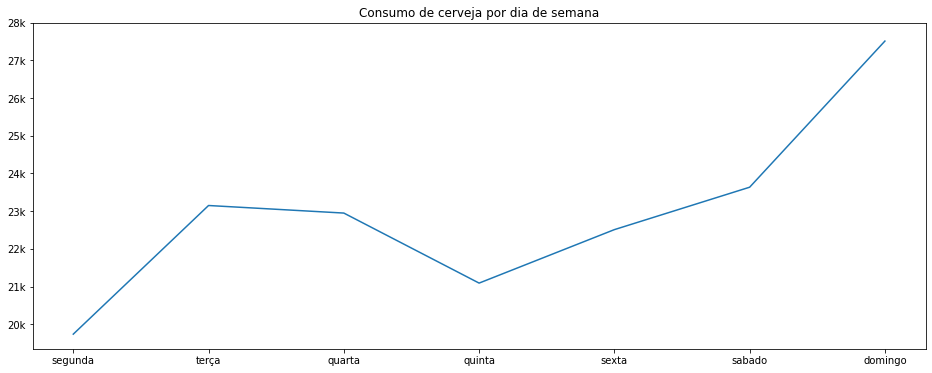

In [81]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=df_aux, x='dia_semana', y='consumo_L')

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_yticks(np.arange(20000, 29000, 1000, dtype=object))
ax.set_yticklabels([label + 'k' for label in list(map(str, np.arange(20, 29, 1, dtype=object)))])

plt.title('Consumo de cerveja por dia de semana')

Fim de semana há um maior consumo de cerveja, porém essa diferença é significativa apenas para o domingo.

In [90]:
df_aux = df_consumo_cerveja_limpo[['mes', 'consumo_L']].groupby('mes')\
                                                                .agg({'consumo_L':'mean'})\
                                                                .round(0)\
                                                                .reset_index()

df_aux.mes = pd.Categorical(df_aux.mes,
                                   ['janeiro', 
                                    'fevereiro', 
                                    'março', 
                                    'abril', 
                                    'maio', 
                                    'junho', 
                                    'julho', 
                                    'agosto', 
                                    'setembro', 
                                    'outubro', 
                                    'novembro', 
                                    'dezembro'], 
                                   ordered=True)


df_aux.sort_values('mes')

,mes,consumo_L
4,janeiro,23622.0
3,fevereiro,25032.0
8,março,21610.0
0,abril,21367.0
7,maio,20759.0
6,junho,22187.0
5,julho,19624.0
1,agosto,22228.0
11,setembro,24180.0
10,outubro,25919.0


In [91]:
df_aux.consumo_L = df_aux.consumo_L.astype(int)
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   mes        12 non-null     category
 1   consumo_L  12 non-null     int64   
dtypes: category(1), int64(1)
memory usage: 632.0 bytes


Text(0.5, 1.0, 'Consumo de cerveja por mes')

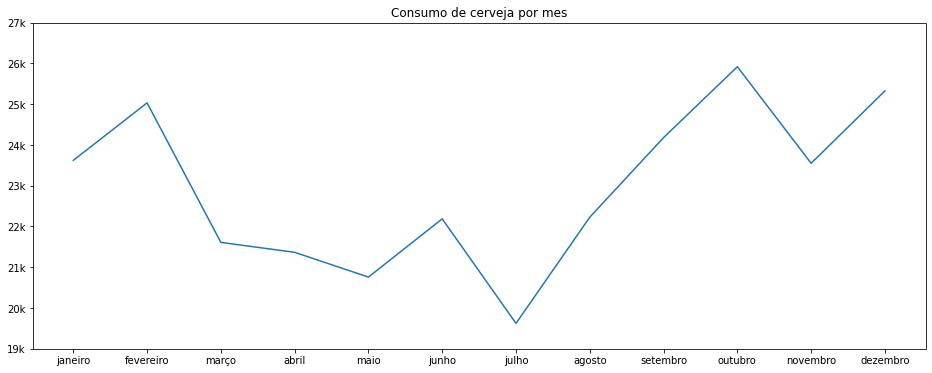

In [96]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=df_aux, x='mes', y='consumo_L')

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_yticks(np.arange(19000, 28000, 1000, dtype=object))
ax.set_yticklabels([label + 'k' for label in list(map(str, np.arange(19, 28, 1, dtype=object)))])

plt.title('Consumo de cerveja por mes')

## temp_media_c

In [46]:
pd.DataFrame(df_consumo_cerveja_limpo[['temp_media_c']].describe().round(2))

,temp_media_c
count,365.00
mean,21.23
std,3.18
min,12.90
25%,19.02
50%,21.38
75%,23.28
max,28.86


<AxesSubplot:xlabel='temp_media_c'>

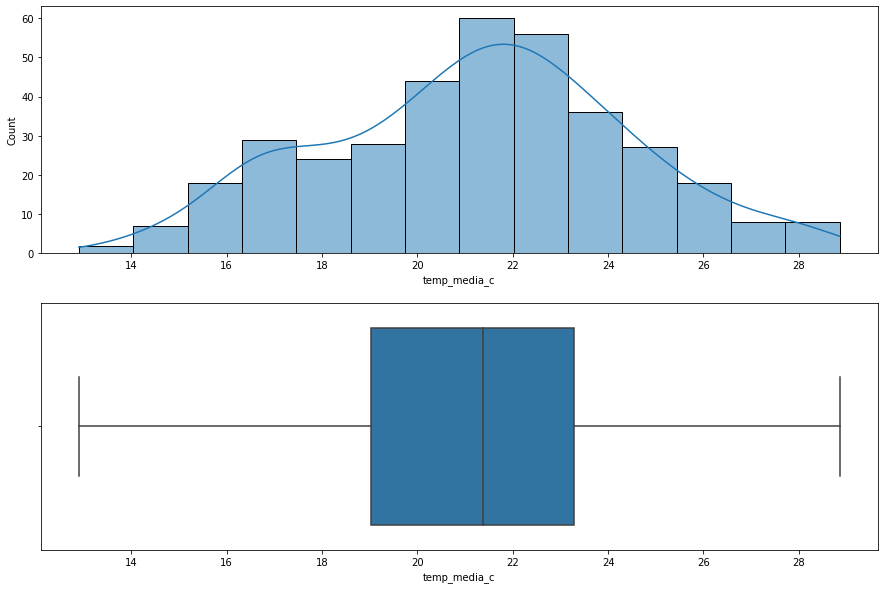

In [47]:
fig, axs = plt.subplots(2, figsize=(15,10))

sns.histplot(data=df_consumo_cerveja_limpo, x='temp_media_c', ax=axs[0], kde=True)
sns.boxplot(data=df_consumo_cerveja_limpo, x='temp_media_c', ax=axs[1])

Nota-se que a temperatura média ficou em torno de 21ºC com desvio padrão de 3ºC com uma distribução normanl. Desta forma, compreende-se que não foi um ano marcado por altas temperaturas.

## precipitacao_mm

<AxesSubplot:xlabel='precipitacao_mm'>

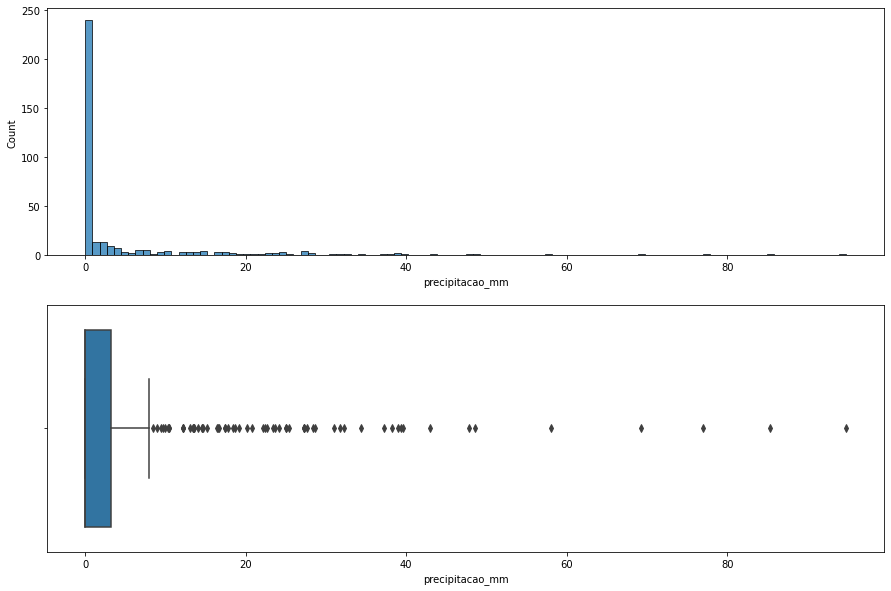

In [48]:
fig, axs = plt.subplots(2, figsize=(15,10))

sns.histplot(data=df_consumo_cerveja_limpo, x='precipitacao_mm', ax=axs[0])
sns.boxplot(data=df_consumo_cerveja_limpo, x='precipitacao_mm', ax=axs[1])

In [49]:
pd.DataFrame(df_consumo_cerveja_limpo.precipitacao_mm.describe().round(2))

,precipitacao_mm
count,365.00
mean,5.20
std,12.42
min,0.00
25%,0.00
50%,0.00
75%,3.20
max,94.80


In [50]:
df_consumo_cerveja_limpo.groupby('precipitacao_mm').agg({'data':'count'}).rename(columns={'data':'count'}).reset_index()

,precipitacao_mm,count
0,0.0,218
1,0.1,6
2,0.2,4
3,0.3,2
4,0.4,3
...,...,...
88,58.0,1
89,69.2,1
90,77.0,1
91,85.3,1


**Chuva fraca**: quando a intensidade é inferior a 2,5 milímetros por hora (mm/h);
    
**Chuva moderada**: quando a intensidade é igual ou superior a 2,5 mm/h mas inferior a 10 mm/h;
    
**Chuva forte**: quando a intensidade é igual ou superior a 10 mm/h mas inferior a 50 mm/h;
    
**Chuva violenta**: quando a intensidade é superior a 50 mm/h (geralmente sob a forma de aguaceiros).

Fonte: Organização Meteorológica Mundial (2008). Guide to Meteorological Instruments and Methods of Observation - (WMO-No. 8) (PDF) (em inglês). Genebra, Suíça: Organização Meteorológica Mundial. p. I.14–9. ISBN 978-92-63-10008-5. Consultado em 4 de julho de 2019

In [51]:
df_consumo_cerveja_limpo.groupby(pd.cut(df_consumo_cerveja_limpo["precipitacao_mm"], [0, 2.5, 10, 50, 100], right=False)).count()

,data,dia_semana,mes,fds,temp_media_c,temp_min_c,temp_max_c,precipitacao_mm,consumo_L
precipitacao_mm,,,,,,,,,
"[0.0, 2.5)",267,267,267,267,267,267,267,267,267
"[2.5, 10.0)",39,39,39,39,39,39,39,39,39
"[10.0, 50.0)",54,54,54,54,54,54,54,54,54
"[50.0, 100.0)",5,5,5,5,5,5,5,5,5


Apesar da métrica ser em hora e a base contar apenas com a precipitação do dia, para fins de análise, podemos supor que:
   
    » aproximadamente 60% dos dias não houve chuva;
    
    » 23% houve no máximo uma chuva fraca a moderada.

## Consumo de Cerveja em Litros

In [52]:
pd.DataFrame(df_consumo_cerveja_limpo.consumo_L.describe().round(2))

,consumo_L
count,365.00
mean,22934.63
std,8140.30
min,203.00
25%,21092.00
50%,24304.00
75%,28034.00
max,37937.00


<AxesSubplot:xlabel='consumo_L'>

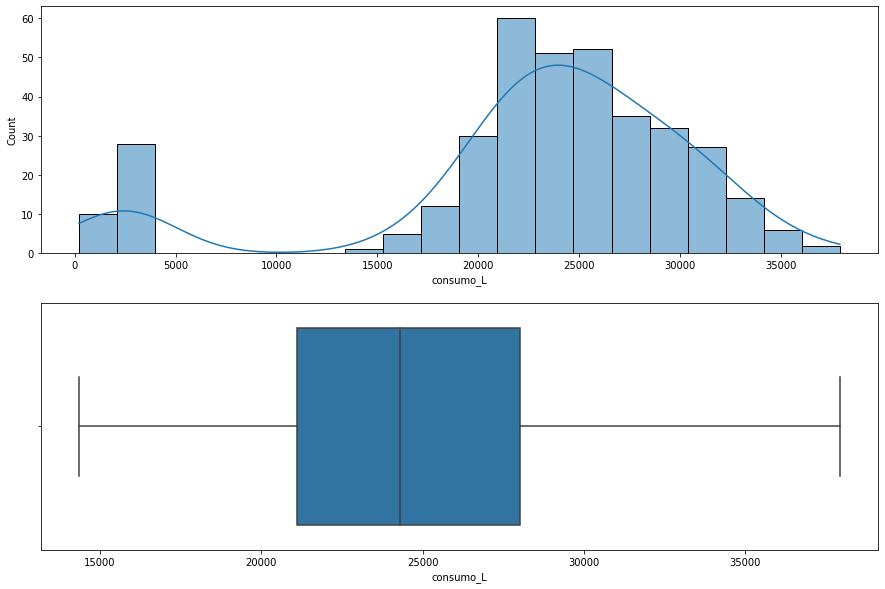

In [53]:
fig, axs = plt.subplots(2, figsize=(15,10))

sns.histplot(data=df_consumo_cerveja_limpo, x='consumo_L', kde=True, ax=axs[0])
sns.boxplot(data=df_consumo_cerveja_limpo, x='consumo_L', ax=axs[1], showfliers = False)

Nota-se que 50% dos dados estão concentrados em um espaço menor do que 1 desvio padrão das variáveis. Através do histograma, podemos perceber quase que uma distribuição normal. Não consideraria como bimodal pois entendo que os dias com menos de 5000L são outliers.

## Correlação Entre Preciptação e Consumo de Cerveja

In [145]:
df_consumo_cerveja_limpo[['precipitacao_mm', 'consumo_L']].corr().round(2)

,precipitacao_mm,consumo_L
precipitacao_mm,1.00,-0.04
consumo_L,-0.04,1.00


A correlação entre as variáveis se aproximam muito de 0 indicando que não há ligação direta entre as variáveis, ou seja, a chuva não influência na quantidade de cerveja consumida entre as pessoas.

## Correlação Entre Temperatura média e Consumo de Cerveja

In [55]:
df_consumo_cerveja_limpo[['temp_media_c', 'consumo_L']].corr().round(2)

,temp_media_c,consumo_L
temp_media_c,1.00,0.26
consumo_L,0.26,1.00


Como na análise da precipitação com o consumo de cerveja, o coeficiente de correlação não indica de forma clara que a temperatura do dia influencia no consumo de cerveja.

Agora, vou observar a média ponderada de litros de cerveja consumidos pela temperatuda média do dia

In [220]:
df_aux = df_consumo_cerveja_limpo[['data', 'temp_media_c', 'consumo_L']].copy()
df_aux.temp_media_c = df_aux.temp_media_c.round(0).astype(int)
df_aux.consumo_L = df_aux.consumo_L.astype(int)
df_aux.head()

,data,temp_media_c,consumo_L
0,2015-01-01,27,25461
1,2015-01-02,27,28972
2,2015-01-03,25,30814
3,2015-01-04,24,29799
4,2015-01-05,24,289


Extraindo a quantidade de amostrar por temperatura media

In [219]:
df_aux_qtd_amostras = df_aux.groupby('temp_media_c').agg({'data':'count'}).rename(columns={'data':'qtd_amostras'})
df_aux_qtd_amostras.head()

,qtd_amostras
temp_media_c,
13,1
14,2
15,9
16,19
17,26


Somando o total litros consumidos por grau de temperatura

In [218]:
df_sum_by_temp_media = df_aux.groupby('temp_media_c').sum('consumo_L')
df_sum_by_temp_media.head()

,consumo_L
temp_media_c,
13,21294
14,43066
15,167463
16,368444
17,527896


Fazendo o merge da quantidade de amostras pelo total da soma de litros consumidos e criação da tabela com a média ponderada.

In [239]:
df_merged = df_aux_qtd_amostras.merge(df_sum_by_temp_media, on='temp_media_c').reset_index()
df_merged['consumo_medio_L'] = (df_merged['consumo_L'] / df_merged['qtd_amostras']).round(0).astype(int)
df_merged = df_merged[['temp_media_c', 'consumo_medio_L']]
df_merged

,temp_media_c,consumo_medio_L
0,13,21294
1,14,21533
2,15,18607
3,16,19392
4,17,20304
5,18,19828
6,19,22275
7,20,21634
8,21,22219
9,22,22820


A temperatura de 29ºC aparenta ser um outlier.

In [240]:
df_merged.drop(index=16, inplace=True)

Text(0.5, 1.0, 'Consumo médio ponderado de Cerveja em Litros por Temperatura Média')

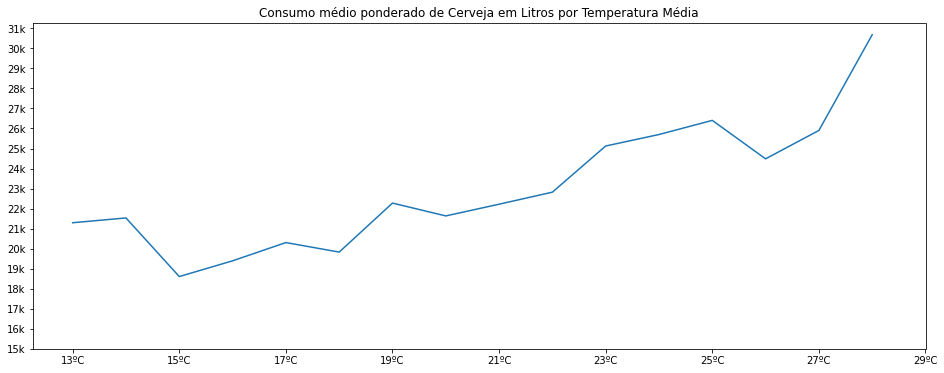

In [241]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=df_merged, x='temp_media_c', y='consumo_medio_L')
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_yticks(np.arange(15000, 32000, 1000, dtype=object))
ax.set_yticklabels([label + 'k' for label in list(map(str, np.arange(15, 32, 1, dtype=object)))])
    
ax.set_xticks(np.arange(13, 31, 2, dtype=object))
ax.set_xticklabels([label + 'ºC' for label in list(map(str, np.arange(13, 31, 2, dtype=object)))])

plt.title('Consumo médio ponderado de Cerveja em Litros por Temperatura Média')

Ao visualizar a média ponderada de litros pela média de temperatura de forma gráfica notamos que o consumo de alcool aumenta de acordo com a temperatura, indicando que há uma relação positiva entre esses dados. 

## Correlação entre variação de temperatura em consumo de cerveja

In [243]:
df_aux = df_consumo_cerveja_limpo.copy()
df_aux['variacao_temp'] = (df_aux.temp_max_c - df_aux.temp_min_c).round(0)
df_aux[['temp_max_c', 'temp_min_c', 'variacao_temp']].head()

,temp_max_c,temp_min_c,variacao_temp
0,32.5,23.9,9.0
1,33.5,24.5,9.0
2,29.9,22.4,8.0
3,28.6,21.5,7.0
4,28.3,21.0,7.0


Aplicação do pipeline feito para calcular média ponderada de consumo de cerveja por temperatura média levando em consideração a variação de temperatura

In [245]:
df_aux_qtd_amostras = df_aux.groupby('variacao_temp').agg({'data':'count'}).rename(columns={'data':'qtd_amostras'})

df_sum_by_variacao_temp = df_aux.groupby('variacao_temp').sum('consumo_L')

df_merged = df_aux_qtd_amostras.merge(df_sum_by_variacao_temp, on='variacao_temp').reset_index()
df_merged['consumo_medio_L'] = (df_merged['consumo_L'] / df_merged['qtd_amostras']).round(0).astype(int)
df_merged = df_merged[['variacao_temp', 'consumo_medio_L']]
df_merged

,variacao_temp,consumo_medio_L
0,2.0,20106
1,3.0,15539
2,4.0,20118
3,5.0,19518
4,6.0,21554
5,7.0,20211
6,8.0,22044
7,9.0,22502
8,10.0,23696
9,11.0,26750


Text(0.5, 1.0, 'Consumo médio de Cerveja em Litros por Variação de Temperatura')

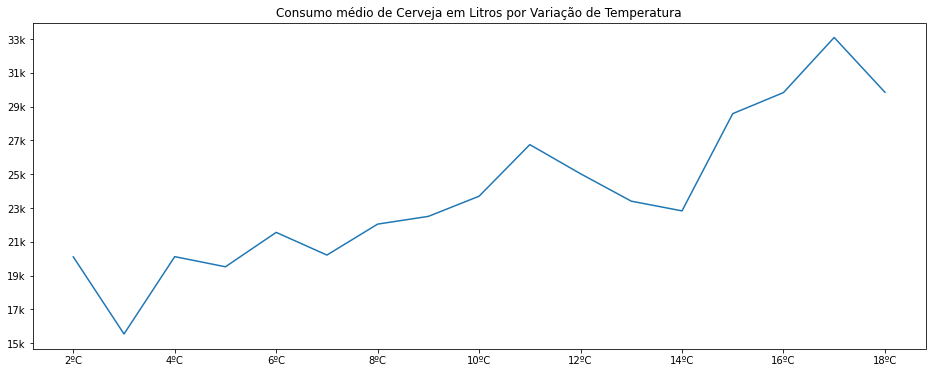

In [250]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=df_merged, x='variacao_temp', y='consumo_medio_L')
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_yticks(np.arange(15000, 35000, 2000, dtype=object))
ax.set_yticklabels([label + 'k' for label in list(map(str, np.arange(15, 35, 2, dtype=object)))])
    
ax.set_xticks(np.arange(2, 19, 2, dtype=object))
ax.set_xticklabels([label + 'ºC' for label in list(map(str, np.arange(2, 19, 2, dtype=object)))])

plt.title('Consumo médio de Cerveja em Litros por Variação de Temperatura')

Assim como o padrão observado durante a visualização da média ponderada de litros pela média de temperatura notamos que o consumo de alcool aumenta de acordo com a variação.

## Relação Entre Consumo de Cerveja e Finais de Semana

In [56]:
df_consumo_cerveja_limpo[['fds', 'consumo_L']].groupby('fds').agg({'consumo_L':'mean'}).round(2)

,consumo_L
fds,
0,21883.46
1,25572.64


Há um maior consumo de cerveja nos fins de semana.

# Aplicação do Modelo de Regressão Linear

O objetivo do modelo será predizer o consumo de litros de cerveja partindo de informações sobre flag de final de semana, temperatura média, variação de temperatura, precipitacao e dia da semana.

In [264]:
df_consumo_cerveja_limpo.head()

,data,dia_semana,mes,fds,temp_media_c,temp_min_c,temp_max_c,precipitacao_mm,consumo_L
0,2015-01-01,quinta-feira,janeiro,0,27.30,23.9,32.5,0.0,25461
1,2015-01-02,sexta-feira,janeiro,0,27.02,24.5,33.5,0.0,28972
2,2015-01-03,sabado,janeiro,1,24.82,22.4,29.9,0.0,30814
3,2015-01-04,domingo,janeiro,1,23.98,21.5,28.6,1.2,29799
4,2015-01-05,segunda-feira,janeiro,0,23.82,21.0,28.3,0.0,289


### Dummy Variable

Pirmeiro passo é transformar a variável de dia da semana em variáveis dummy e removendo uma coluna devido ao dummy variable trap

In [266]:
df_limpo_dia_semana_dummy = pd.get_dummies(data=df_consumo_cerveja_limpo, columns=['dia_semana'])
df_limpo_dia_semana_dummy.drop(columns=['dia_semana_segunda-feira'])
df_limpo_dia_semana_dummy.head()

,data,mes,fds,temp_media_c,temp_min_c,temp_max_c,precipitacao_mm,consumo_L,dia_semana_domingo,dia_semana_quarta-feira,dia_semana_quinta-feira,dia_semana_sabado,dia_semana_segunda-feira,dia_semana_sexta-feira,dia_semana_terça-feira
0,2015-01-01,janeiro,0,27.30,23.9,32.5,0.0,25461,0,0,1,0,0,0,0
1,2015-01-02,janeiro,0,27.02,24.5,33.5,0.0,28972,0,0,0,0,0,1,0
2,2015-01-03,janeiro,1,24.82,22.4,29.9,0.0,30814,0,0,0,1,0,0,0
3,2015-01-04,janeiro,1,23.98,21.5,28.6,1.2,29799,1,0,0,0,0,0,0
4,2015-01-05,janeiro,0,23.82,21.0,28.3,0.0,289,0,0,0,0,1,0,0


In [267]:
df_limpo_dia_semana_dummy.columns

Index(['data', 'mes', 'fds', 'temp_media_c', 'temp_min_c', 'temp_max_c',
       'precipitacao_mm', 'consumo_L', 'dia_semana_domingo',
       'dia_semana_quarta-feira', 'dia_semana_quinta-feira',
       'dia_semana_sabado', 'dia_semana_segunda-feira',
       'dia_semana_sexta-feira', 'dia_semana_terça-feira'],
      dtype='object')

In [268]:
X = df_limpo_dia_semana_dummy[['fds', 'temp_media_c', 'precipitacao_mm', 'dia_semana_domingo', 'dia_semana_quarta-feira', 
                               'dia_semana_quinta-feira', 'dia_semana_sabado', 'dia_semana_segunda-feira',
                               'dia_semana_sexta-feira', 'dia_semana_terça-feira']].copy()

X['variacao_temp'] = (df_consumo_cerveja_limpo.temp_max_c - df_consumo_cerveja_limpo.temp_min_c).round(2)
X

,fds,temp_media_c,precipitacao_mm,dia_semana_domingo,dia_semana_quarta-feira,dia_semana_quinta-feira,dia_semana_sabado,dia_semana_segunda-feira,dia_semana_sexta-feira,dia_semana_terça-feira,variacao_temp
0,0,27.30,0.0,0,0,1,0,0,0,0,8.6
1,0,27.02,0.0,0,0,0,0,0,1,0,9.0
2,1,24.82,0.0,0,0,0,1,0,0,0,7.5
3,1,23.98,1.2,1,0,0,0,0,0,0,7.1
4,0,23.82,0.0,0,0,0,0,1,0,0,7.3
...,...,...,...,...,...,...,...,...,...,...,...
360,1,24.00,13.6,1,0,0,0,0,0,0,7.1
361,0,22.64,0.0,0,0,0,0,1,0,0,5.6
362,0,21.68,10.3,0,0,0,0,0,0,1,3.8
363,0,21.38,6.3,0,1,0,0,0,0,0,3.1


### Selecionando variável dependente

In [271]:
y = df_consumo_cerveja_limpo['consumo_L']
y

0      25461
1      28972
2      30814
3      29799
4        289
       ...  
360    32307
361    26095
362    22309
363    20467
364    22446
Name: consumo_L, Length: 365, dtype: int64

### Divisão em treino e teste

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

transformer = Normalizer().fit(X)
X_normalized = transformer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y,
                                                        test_size = 0.25,
                                                        random_state = 13)

df_informativo_separacao = pd.DataFrame({
    'grupos'  : ['X - dados','y - label'],
    'total'   : [X_normalized.shape[0], y.shape[0]],
    'treino'  : [X_train.shape[0], y_train.shape[0]],
    'teste'   : [X_test.shape[0], y_test.shape[0]],
    'colunas' : [X.shape[1], 1]
}).set_index('grupos')

df_informativo_separacao

,total,treino,teste,colunas
grupos,,,,
X - dados,365,273,92,11
y - label,365,273,92,1


### Treino do modelo

In [287]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [288]:
print(f'R² = {regressor.score(X_train, y_train)}')

R² = 0.20401210243934187
